     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 63.4 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pennylane/devices/device_api.py:193: PennyLaneDeprecationWarning: Setting shots on device is deprecated. Please use the `set_shots` transform on the respective QNode instead.
  warnings.warn(



Testing constant_zero:
Classical truth table: {'00': 0, '01': 0, '10': 0, '11': 0}
PennyLane: Constant (P(|00⟩)=1.0000)
Qiskit: Constant (Counts: {'00': 1000})

Testing constant_one:
Classical truth table: {'00': 1, '01': 1, '10': 1, '11': 1}
PennyLane: Constant (P(|00⟩)=1.0000)
Qiskit: Constant (Counts: {'00': 1000})

Testing balanced_x0:
Classical truth table: {'00': 0, '01': 0, '10': 1, '11': 1}
PennyLane: Balanced (P(|00⟩)=0.0000)
Qiskit: Balanced (Counts: {'01': 1000})

Testing balanced_x1:
Classical truth table: {'00': 0, '01': 1, '10': 0, '11': 1}
PennyLane: Balanced (P(|00⟩)=0.0000)
Qiskit: Balanced (Counts: {'10': 1000})

Testing balanced_xor:
Classical truth table: {'00': 0, '01': 1, '10': 1, '11': 0}
PennyLane: Balanced (P(|00⟩)=0.0000)
Qiskit: Balanced (Counts: {'11': 1000})

Testing balanced_and:
Classical truth table: {'00': 0, '01': 0, '10': 0, '11': 1}
PennyLane: Balanced (P(|00⟩)=0.2570)
Qiskit: Balanced (Counts: {'00': 240, '10': 252, '01': 259, '11': 249})


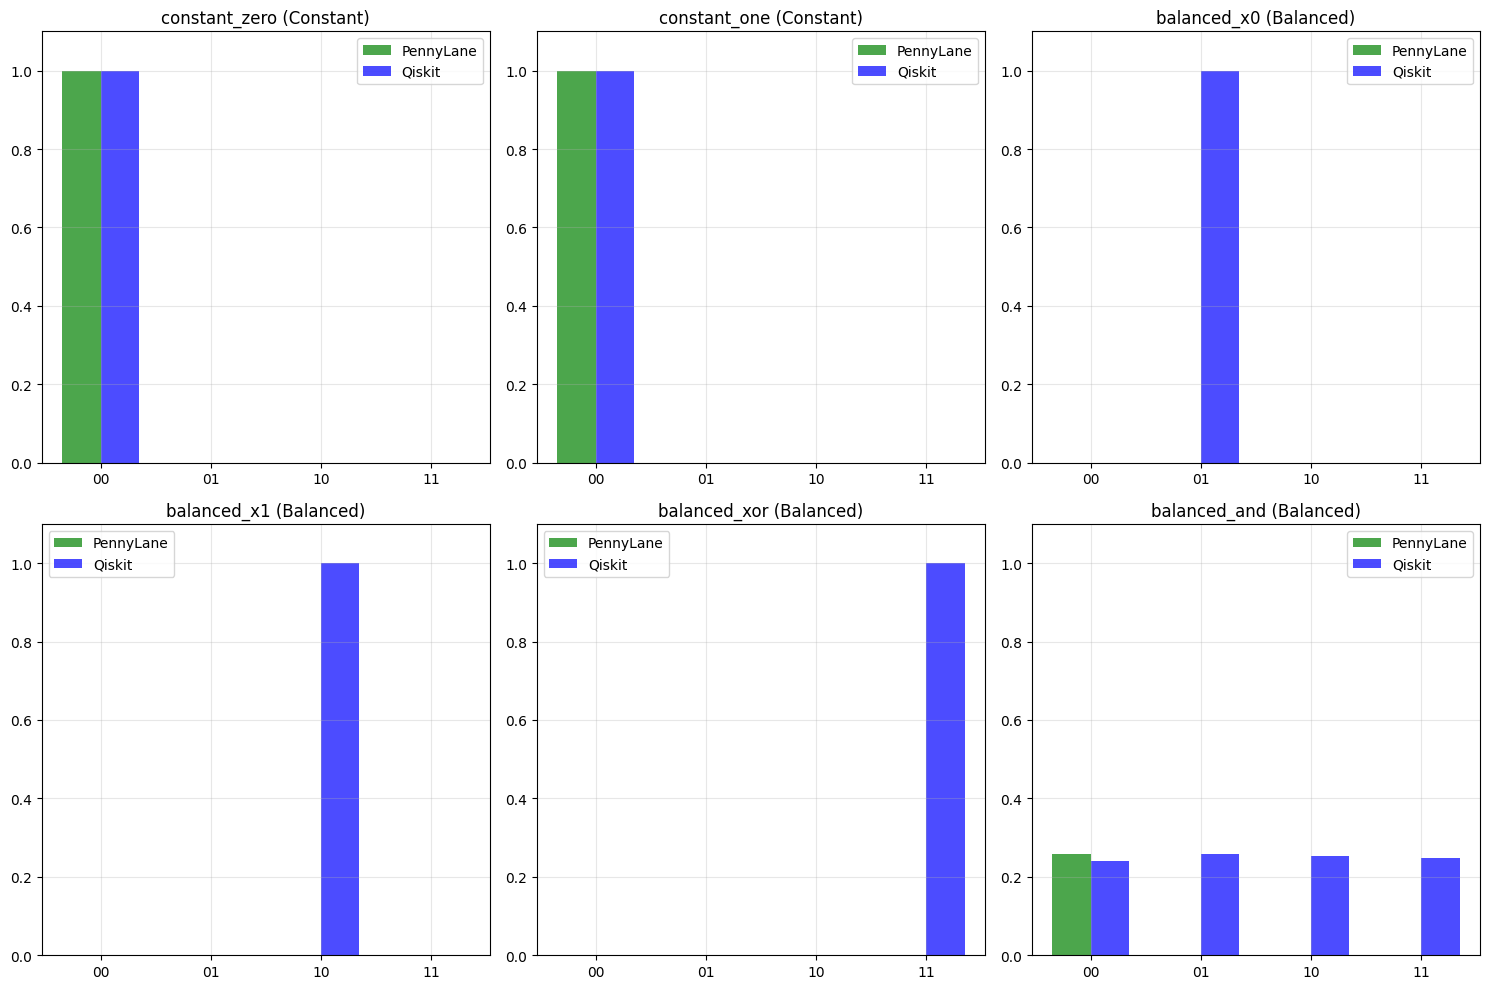

In [ ]:
# Install dependencies
!pip install pennylane qiskit qiskit-aer --quiet

import pennylane as qml
from pennylane import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# ---------------- ORACLE DEFINITIONS ----------------
oracle_types = ['constant_zero', 'constant_one', 'balanced_x0',
                'balanced_x1', 'balanced_xor', 'balanced_and']

def classical_truth_table(oracle_type):
    if oracle_type == 'constant_zero': return {'00':0,'01':0,'10':0,'11':0}
    elif oracle_type == 'constant_one': return {'00':1,'01':1,'10':1,'11':1}
    elif oracle_type == 'balanced_x0': return {'00':0,'01':0,'10':1,'11':1}
    elif oracle_type == 'balanced_x1': return {'00':0,'01':1,'10':0,'11':1}
    elif oracle_type == 'balanced_xor': return {'00':0,'01':1,'10':1,'11':0}
    elif oracle_type == 'balanced_and': return {'00':0,'01':0,'10':0,'11':1}

# ---------------- PENNYLANE ----------------
dev = qml.device('default.qubit', wires=3, shots=1000)

def constant_zero_oracle(): pass
def constant_one_oracle(): qml.PauliZ(wires=2)
def balanced_x0_oracle(): qml.CNOT(wires=[0,2])
def balanced_x1_oracle(): qml.CNOT(wires=[1,2])
def balanced_xor_oracle():
    qml.CNOT(wires=[0,2])
    qml.CNOT(wires=[1,2])
def balanced_and_oracle(): qml.Toffoli(wires=[0,1,2])

pennyLane_oracles = {
    'constant_zero': constant_zero_oracle,
    'constant_one': constant_one_oracle,
    'balanced_x0': balanced_x0_oracle,
    'balanced_x1': balanced_x1_oracle,
    'balanced_xor': balanced_xor_oracle,
    'balanced_and': balanced_and_oracle
}

@qml.qnode(dev)
def deutsch_jozsa_circuit(oracle_func):
    qml.PauliX(wires=2)  # initialize |1>
    for i in range(3):
        qml.Hadamard(wires=i)
    oracle_func()
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    return qml.probs(wires=[0,1])

# ---------------- QISKIT ----------------
def create_dj_circuit_qiskit(oracle_type):
    qc = QuantumCircuit(3,2)
    qc.x(2)
    qc.h([0,1,2])

    if oracle_type=='constant_zero': pass
    elif oracle_type=='constant_one': qc.z(2)
    elif oracle_type=='balanced_x0': qc.cx(0,2)
    elif oracle_type=='balanced_x1': qc.cx(1,2)
    elif oracle_type=='balanced_xor':
        qc.cx(0,2)
        qc.cx(1,2)
    elif oracle_type=='balanced_and': qc.ccx(0,1,2)

    qc.h([0,1])
    qc.measure([0,1],[0,1])
    return qc

def run_qiskit_circuit(oracle_type, shots=1000):
    qc = create_dj_circuit_qiskit(oracle_type)
    simulator = Aer.get_backend('qasm_simulator')
    tqc = transpile(qc, simulator)
    result = simulator.run(tqc, shots=shots).result()
    counts = result.get_counts()
    return counts, qc

# ---------------- RUN TEST ----------------
results = []

for oracle_type in oracle_types:
    print(f"\nTesting {oracle_type}:")
    print(f"Classical truth table: {classical_truth_table(oracle_type)}")

    oracle_func = pennyLane_oracles[oracle_type]
    probs = deutsch_jozsa_circuit(oracle_func)
    is_constant_pl = probs[0] > 0.9

    counts, _ = run_qiskit_circuit(oracle_type)
    is_constant_qk = counts.get('00',0)/1000 > 0.9

    results.append({
        'oracle': oracle_type,
        'classical_type': 'Constant' if all(v==list(classical_truth_table(oracle_type).values())[0] for v in classical_truth_table(oracle_type).values()) else 'Balanced',
        'pennyLane_result': 'Constant' if is_constant_pl else 'Balanced',
        'qiskit_result': 'Constant' if is_constant_qk else 'Balanced',
        'pennyLane_p00': probs[0],
        'qiskit_counts': counts
    })

    print(f"PennyLane: {results[-1]['pennyLane_result']} (P(|00⟩)={probs[0]:.4f})")
    print(f"Qiskit: {results[-1]['qiskit_result']} (Counts: {counts})")

# ---------------- PLOT ----------------
fig, axes = plt.subplots(2,3,figsize=(15,10))
axes = axes.flatten()
for i, result in enumerate(results):
    states = ['00','01','10','11']
    pl_probs = [result['pennyLane_p00'],0,0,0]
    qk_counts = result['qiskit_counts']
    qk_probs = [qk_counts.get(state,0)/1000 for state in states]

    x = np.arange(len(states))
    width = 0.35
    axes[i].bar(x-width/2, pl_probs, width, label='PennyLane', alpha=0.7, color='green')
    axes[i].bar(x+width/2, qk_probs, width, label='Qiskit', alpha=0.7, color='blue')
    axes[i].set_title(f"{result['oracle']} ({result['classical_type']})")
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(states)
    axes[i].set_ylim(0,1.1)
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
plt.tight_layout()
plt.show()